In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("Housing.csv")  
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
df_encoded = pd.get_dummies(df, columns=cols, drop_first=True)

In [6]:
X = df_encoded.drop(columns=['price'], axis=1)
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"""
    X_train.shape: {X_train.shape}
    X_test.shape: {X_test.shape}
    y_train.shape: {y_train.shape}
    y_test.shape: {y_test.shape}
""")


    X_train.shape: (436, 13)
    X_test.shape: (109, 13)
    y_train.shape: (436,)
    y_test.shape: (109,)



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   area                             545 non-null    int64
 1   bedrooms                         545 non-null    int64
 2   bathrooms                        545 non-null    int64
 3   stories                          545 non-null    int64
 4   parking                          545 non-null    int64
 5   mainroad_yes                     545 non-null    bool 
 6   guestroom_yes                    545 non-null    bool 
 7   basement_yes                     545 non-null    bool 
 8   hotwaterheating_yes              545 non-null    bool 
 9   airconditioning_yes              545 non-null    bool 
 10  prefarea_yes                     545 non-null    bool 
 11  furnishingstatus_semi-furnished  545 non-null    bool 
 12  furnishingstatus_unfurnished     545 non-null    b

In [10]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.to_list()
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns.to_list()

print(f"numerical_cols:\n {numerical_cols}\n")
print(f"categorical_cols:\n {categorical_cols}")

numerical_cols:
 ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

categorical_cols:
 ['mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']


In [12]:
print(df[numerical_cols].describe())

               area    bedrooms   bathrooms     stories     parking
count    545.000000  545.000000  545.000000  545.000000  545.000000
mean    5150.541284    2.965138    1.286239    1.805505    0.693578
std     2170.141023    0.738064    0.502470    0.867492    0.861586
min     1650.000000    1.000000    1.000000    1.000000    0.000000
25%     3600.000000    2.000000    1.000000    1.000000    0.000000
50%     4600.000000    3.000000    1.000000    2.000000    0.000000
75%     6360.000000    3.000000    2.000000    2.000000    1.000000
max    16200.000000    6.000000    4.000000    4.000000    3.000000


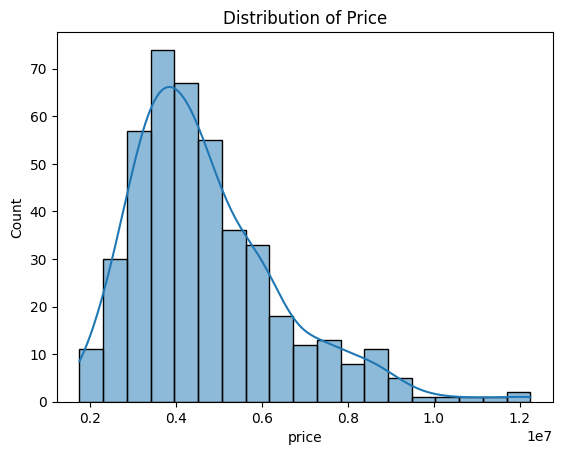

In [13]:
sns.histplot(y_train, kde=True)
plt.title('Distribution of Price')
plt.show()

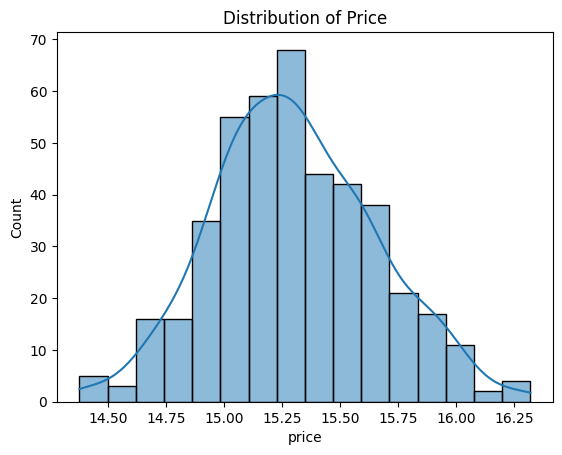

In [14]:
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)
sns.histplot(y_train, kde=True)
plt.title('Distribution of Price')
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled_num = scaler.fit_transform(X_train[[col for col in numerical_cols if col != 'price']])
X_test_scaled_num = scaler.transform(X_test[[col for col in numerical_cols if col != 'price']])

In [16]:
X_train_scaled_num = pd.DataFrame(X_train_scaled_num, columns=numerical_cols, index=X_train.index)
X_test_scaled_num = pd.DataFrame(X_test_scaled_num, columns=numerical_cols, index=X_test.index)

In [17]:
X_train_final = pd.concat([X_train_scaled_num, X_train[categorical_cols]], axis=1)
X_test_final = pd.concat([X_test_scaled_num, X_test[categorical_cols]], axis=1)
X_test_final.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
316,0.338750,1.394055,1.539173,0.254215,0.367957,False,False,True,False,False,False,False,True
77,0.611257,0.055271,1.539173,1.420929,-0.803059,True,False,False,False,True,True,False,False
360,-0.506019,-1.283514,-0.557950,-0.912499,-0.803059,True,False,False,False,False,False,True,False
90,-0.070009,0.055271,-0.557950,0.254215,-0.803059,True,False,False,False,True,False,True,False
493,-0.542353,0.055271,-0.557950,-0.912499,-0.803059,True,False,False,False,False,False,False,False


In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_final, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
y_pred_log = model.predict(X_test_final)
y_pred_actual = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f"RMSE: {rmse:,.2f}")
print(f"R² Score: {r2:.3f}")

RMSE: 1,314,648.20
R² Score: 0.658


In [24]:
import sklearn
print(sklearn.__version__)

1.7.0


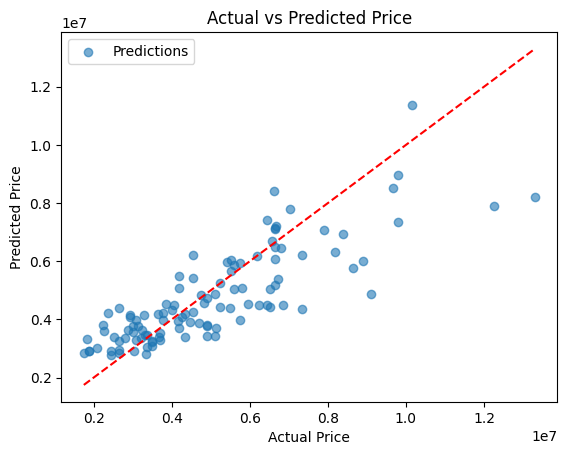

In [25]:
plt.scatter(y_test_actual, y_pred_actual, alpha=0.6, label='Predictions')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()],
         'r--')  # Line for perfect prediction
plt.legend()
plt.show()